<a href="https://colab.research.google.com/github/Nikithanraj21-25/Project-AI/blob/main/18-fake_real_news-classification-ml/fake_real_news_classification-NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Required Libraries**

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import itertools

### **Import Dataset**

In [57]:
df = pd.read_csv('fake_or_real_news.csv')

### **Data Summarization**

In [58]:
df.shape

(6335, 4)

In [59]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [60]:
df = df.set_index('Unnamed: 0')

In [61]:
df.head(5)

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### **Segregation of Input and Output**

In [62]:
#output
y = df.label
print(y)

#input
x = df.drop('label',axis=1)
print(x)

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
         ... 
4490     REAL
8062     FAKE
8622     FAKE
4021     REAL
4330     REAL
Name: label, Length: 6335, dtype: object
                                                        title  \
Unnamed: 0                                                      
8476                             You Can Smell Hillary’s Fear   
10294       Watch The Exact Moment Paul Ryan Committed Pol...   
3608              Kerry to go to Paris in gesture of sympathy   
10142       Bernie supporters on Twitter erupt in anger ag...   
875          The Battle of New York: Why This Primary Matters   
...                                                       ...   
4490        State Department says it can't find emails fro...   
8062        The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
8622        Anti-Trump Protesters Are Tools of the Oligarc...   
4021        In Ethiopia, Obama seeks progress on peace, se...   
4330        Je

### **Splitting Dataset into Train Data and Test Data**

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x['text'], y, test_size=0.33, random_state=53)

In [64]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

In [65]:
count_vectorizer.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000031', '000035', '00006', '0001',
       '0001pt', '000ft', '000km'], dtype=object)

In [66]:
count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names_out())
print(count_df)

      00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0      0    0     0         0       0      0     0       0      0      0  ...   
1      0    0     0         0       0      0     0       0      0      0  ...   
2      0    0     0         0       0      0     0       0      0      0  ...   
3      0    0     0         0       0      0     0       0      0      0  ...   
4      0    0     0         0       0      0     0       0      0      0  ...   
...   ..  ...   ...       ...     ...    ...   ...     ...    ...    ...  ...   
4239   0    1     0         0       0      0     0       0      0      0  ...   
4240   0    0     0         0       0      0     0       0      0      0  ...   
4241   0    0     0         0       0      0     0       0      0      0  ...   
4242   0    0     0         0       0      0     0       0      0      0  ...   
4243   0    0     0         0       0      0     0       0      0      0  ...   

      حلب  عربي  عن  لم  ما

In [67]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          suptitle='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(suptitle)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion matrix, without normalization')

  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



In [69]:
model = MultinomialNB()

In [70]:
model.fit(count_train, y_train)

MultinomialNB()

In [71]:
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f"% score)

accuracy : 0.893


[[ 865  143]
 [  80 1003]]
Confusion matrix, without normalization


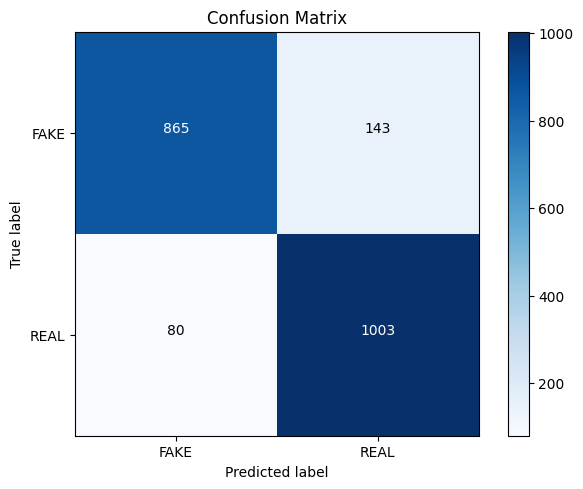

In [72]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', "REAL"])
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
myText = input("enter the input text: ")

In [ ]:
countvec_test = count_vectorizer.transform([myText])

In [ ]:
pred = model.predict(countvec_test)
print(pred)